# Demo of KNN

## AUTHORED by Rick

#### KNN is the simplest classification algorithm in Machine Learning field.
#### It's easy to understand the presence of KNN because its target is trying to find the k nearest samples given to a specific sample.

Using python with numpy, we can implement this algorithm.

In [1]:
#载入numpy库并取名为np
import numpy as np
#载入pandas库并取名为pd
import pandas as pd

In [2]:
data = pd.read_csv('iris.csv') #载入一个鸢(yuan)尾花的经典数据库iris

In [3]:
data[:10]

,slength,swidth,plength,pwidth,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
X = data.drop(['type'],axis = 1) #获取输入X，先扔掉type,要规定axis等于1，不然函数默认找每一行

In [5]:
y = data['type'] #获取输出y

In [6]:
X = X.as_matrix()
y = y.as_matrix() #转换成numpy 的矩阵形式

In [7]:
from sklearn.cross_validation import train_test_split #载入一个切分函数

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train,X_test = train_test_split(X)
y_train,y_test = train_test_split(y)

### Start to implement KNN

In [9]:
#计算两个样本（向量）的欧式距离
def distance(x1,x2):
    dis = 0
    if x1.size!=x2.size:
        print("input dimension not same")
        return -1
    dimension = x1.size #获取数据的维度
    for i in range(dimension):
        dis = dis + (x1[i]-x2[i])**2
    dis = dis**0.5
    return dis

In [10]:
#给定一个带预测数据，获取所有训练样本和它的距离,保存在一个list中
def get_all_distance(x_test,x_train):
    lst = []
    row,col = x_train.shape
    for i in range(row):
        lst.append(distance(x_test,x_train[i]))
    return lst

In [11]:
#为了后续计算k个最近值的方便，生成一个x,y元组构成的list,并进行排序
def get_distance_tuple(lst):
    result= []
    for i in range(len(lst)):
        result.append((lst[i],i))
    result.sort()
    return result
a = get_distance_tuple(get_all_distance(X[0],X_train))

In [12]:
from collections import Counter
#获取最近k个样本对应的y值,并决定最后的样本归属
def predict_type(tuple_lst,k,x):
    y_lst = []
    for i in range(k):
        y_lst.append(y[tuple_lst[i][1]])
    return Counter(y_lst).most_common(1)[0][0]
predict_type(a,5,X_train)

'Iris-versicolor'

In [13]:
# 定义KNN分类函数
def KNN(x_test,x_train,y_train,k):
    result = []
    for i in range(x_test.shape[0]):
        x = x_test[i]
        dist_lst = get_all_distance(x,x_train)
        tuple_lst_sorted = get_distance_tuple(dist_lst)
        result.append(predict_type(tuple_lst_sorted,k,x))
    return np.array(result)

In [14]:
y_pre = KNN(X_test,X_train,y_train,3)
y_pre

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], 
      dtype='<U15')

In [15]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [16]:
sum(y_test==y_pre)/y_test.size

0.26315789473684209

# test KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.18421052631578946

# Data Visualization

#### Using Seaborn & Matplotlib to visualize the data

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data.plot(kind='scatter',x='slength',y='swidth')

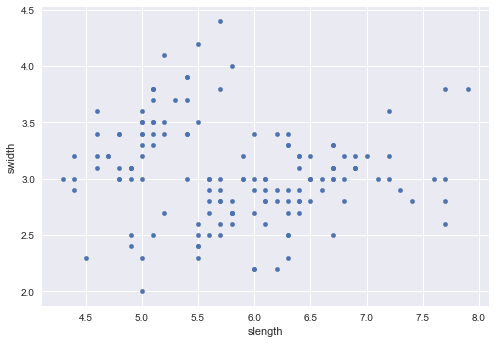

In [21]:
plt.show() #用这个方法展示

In [22]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(data, hue="type", size=5) \
   .map(plt.scatter, "slength", "swidth") \
   .add_legend()

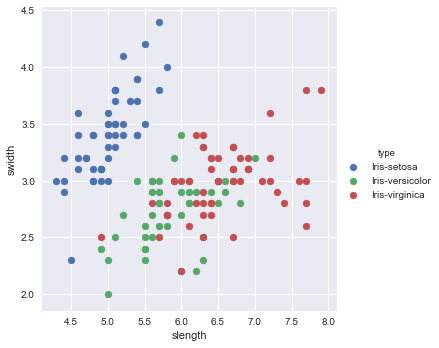

In [23]:
plt.show()

# View prediction

In [40]:
y_pre_all = KNN(X,X,y,3)
plt.plot(X[:,1],X[:,2],'b.')

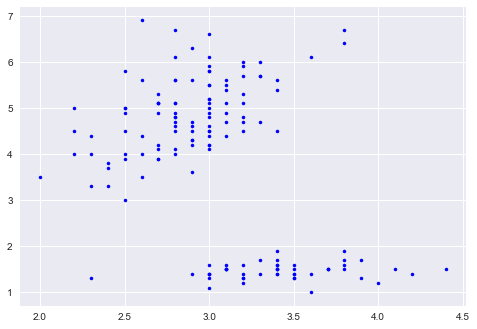

In [41]:
plt.show()

In [43]:
data_predicted = pd.DataFrame({"slength":X[:,0],"swidth":X[:,1],"type":y_pre_all})  

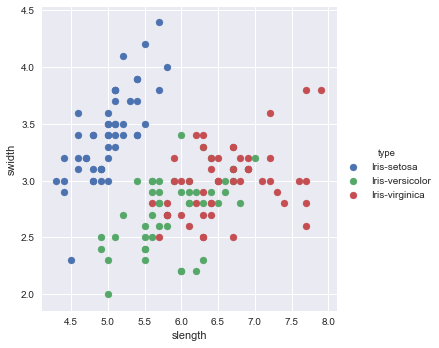

In [44]:
sns.FacetGrid(data_predicted, hue="type", size=5) \
   .map(plt.scatter, "slength", "swidth") \
   .add_legend()
plt.show()

In [45]:
sum(y==y_pre_all)/y.size

0.95999999999999996